# Student Name: Yuan-Yao Lou
# ECE 595 Machine Learning II
# Project 1: CLDNN - Student Code


---


\\

In [2]:
# Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM, InputLayer
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [3]:
# Import dataset and normalize to [0,1]
# Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train / 255.0
data_test  = data_test / 255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test  = data_test.reshape(10000, 28, 28, 1)

# Create labels as one-hot vectors
# labels_train and labels_test have shapes (60000, 10) and (10000, 10) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test  = keras.utils.np_utils.to_categorical(labels_test,  num_classes=10)

4431872/4422102 [==============================] - 1s 0us/step


#Part 1: Plotting cross entropy

Text(0.5,1,'Negative Log-Likelihood (NLL) vs. Probability [0, 1]')

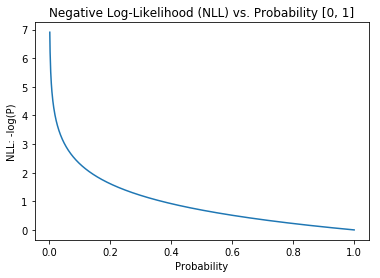

In [ ]:
# Show cross-entropy loss function
# = Negative Log-Likelihood (NLL): L(y) = log(y), y in [0, 1]

prob = np.linspace(0.001, 1.000, 1000)
neg_log = -np.log(prob)

plt.figure()
plt.plot(prob, neg_log)
plt.xlabel("Probability")
plt.ylabel("NLL: -log(P)")
plt.yticks(np.arange(min(neg_log), max(neg_log)+1, 1.0))
plt.title("Negative Log-Likelihood (NLL) vs. Probability [0, 1]")

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: The value of the Negative Log-Likelihood (NLL) of p drastically increases as p gets smaller. In contrast, the value of the negative log-likelihood of p gradually decreases as p gets larger.

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: First, we want to maximize the probability of choosing the correct category. Thus, we can maximize by "minimizing the negative" log-likelihood. Just as the plot shows, when the value of the NLL function goes to 0, the model has the maximized probability. 
  
  Next, regarding the probability space and the interaction with log behavior, let's take an example to further explain the behavior of NLL. If the probability of 4 possible classes is [0.1, 0.3, 0.5, 0.1], assume that the true answer is the fourth class ([0, 0, 0, 1]). The model with NLL produce -ln(0.1) = 2.3. However, the correct one would have been the third class. The model with NLL then produce -ln(0.5) = 0.69. We see that the better the prediction the lower the NLL loss, and that is exactly what we want.

#Part 2: Overfit CNN

In [ ]:
# Create and train model architecture
def CNN_overfit(x1, x2, y):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()
    
    # 1st hidden layer with input
    # [Note] 
    #  - activation with sigmoid improves the performance
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(x1, x2, 1)))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))

    # output layer with Softmax
    # [Note]
    #  - Softmax activation function makes sure the probabilities sum up to 1.
    model.add(Dense(y, activation='softmax'))

    return model

# Create instance of CNN model graph
CNN_overfit = CNN_overfit(28, 28, 10)

# Compile model using an appropriate loss and optimizer algorithm
# [Note] 
#  - SGD is too strong, not causing overfitting
# [Reference] 
#  - RMSprop: https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a
#  - Trend in ML: https://karpathy.medium.com/a-peek-at-trends-in-machine-learning-ab8a1085a106
#  - Overfitting Handling: https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e
CNN_overfit.compile(optimizer='rmsprop', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
# [Note] 
#  - set shuffle to True to improve the performance
history = CNN_overfit.fit(data_train, labels_train, 
                          validation_data = (data_test, labels_test),
                          epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training (* 100 to make it be %)
accuracy = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: {0:.2f}".format(accuracy[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 193us/step - loss: 1.8998 - accuracy: 0.5083 - val_loss: 0.8018 - val_accuracy: 0.6514
Epoch 2/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.6693 - accuracy: 0.7497 - val_loss: 0.6619 - val_accuracy: 0.7322
Epoch 3/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.5537 - accuracy: 0.7941 - val_loss: 0.4950 - val_accuracy: 0.8194
Epoch 4/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.4694 - accuracy: 0.8243 - val_loss: 0.4651 - val_accuracy: 0.8281
Epoch 5/200
60000/60000 [==============================] - 11s 189us/step - loss: 0.4176 - accuracy: 0.8453 - val_loss: 0.3868 - val_accuracy: 0.8585
Epoch 6/200
60000/60000 [==============================] - 11s 190us/step - loss: 0.3836 - accuracy: 0.8572 - val_loss: 0.4858 - val_accuracy: 0.8129
Epoch 7/200
60000/60000 [=========================

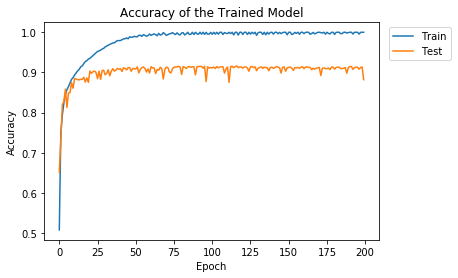

In [ ]:
# Plot accuracy vs epoch

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Trained Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

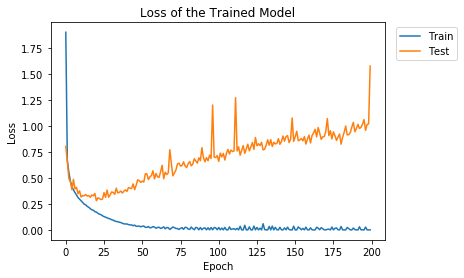

In [ ]:
# Plot loss vs epoch
# [Note] 
#  - This plot is also referred to as "Learning Curves"

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Trained Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: The loss of the training set gradually decreases to 0.

2.   What does the loss of the testing set go to? 

  ANS: The loss of the testing set initially decreases but increases after the 25th epoch.
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS: The information in the training data is of two kinds: signal and noise. The signal is the part that generalizes and thus can help the model make predictions from new data. The noise is that part that is only true of the training data.
  
  The training set loss will go down either when the model learns signal or when it learns noise. But the testing set loss will go down only when the model learns signal. So, when a model learns a signal both losses go down, but when it learns noise a gap (discrepancy) between two losses is created. Especially overfitting happens in this part, so there is almost no loss for the training set.

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: The accuracy discrepancy between the testing set and training set is due to overfitting the training set. As we see in the plot, the accuracy of the training set is close to 1, which means the model perfectly fits the training set. However, the model fails to predict precisely the data that it hasn't seen. In other words, it does not have generalization capability to the new data.
  
  We could handle the overfitting by applying regularization (adding a cost to the loss function for large weights) or using dropout layers (randomly remove certain features by setting them to zero).

#Part 3: Dropout on input layer

In [ ]:
# Create and train model architecture
def CNN_dropout_in(x1, x2, y):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # add 30% dropout rate to the input layer
    model.add(Dropout(0.3, input_shape=(x1, x2, 1)))

    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))

    # output layer with Softmax
    model.add(Dense(y, activation='softmax'))

    return model

# Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in(28, 28, 10)

# Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_in.compile(optimizer='rmsprop', 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_3 = CNN_dropout_in.fit(data_train, labels_train, 
                               validation_data = (data_test, labels_test),
                               epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training (* 100 to make it be %)
accuracy = CNN_dropout_in.evaluate(data_test, labels_test)
print("Accuracy: {0:.2f}".format(accuracy[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 12s 204us/step - loss: 2.6054 - accuracy: 0.4781 - val_loss: 1.0739 - val_accuracy: 0.6252
Epoch 2/200
60000/60000 [==============================] - 12s 200us/step - loss: 0.7078 - accuracy: 0.7303 - val_loss: 0.7933 - val_accuracy: 0.7225
Epoch 3/200
60000/60000 [==============================] - 12s 200us/step - loss: 0.6146 - accuracy: 0.7651 - val_loss: 0.6974 - val_accuracy: 0.7500
Epoch 4/200
60000/60000 [==============================] - 12s 199us/step - loss: 0.5610 - accuracy: 0.7847 - val_loss: 0.6109 - val_accuracy: 0.7953
Epoch 5/200
60000/60000 [==============================] - 12s 199us/step - loss: 0.4956 - accuracy: 0.8096 - val_loss: 0.5529 - val_accuracy: 0.8085
Epoch 6/200
60000/60000 [==============================] - 12s 199us/step - loss: 0.4631 - accuracy: 0.8238 - val_loss: 0.5732 - val_accuracy: 0.8098
Epoch 7/200
60000/60000 [=========================

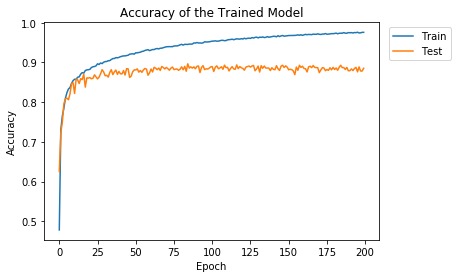

In [ ]:
# Plot accuracy vs epoch

plt.figure()
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy of the Trained Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

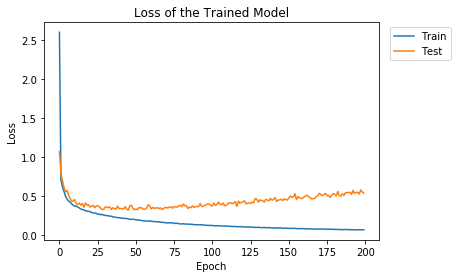

In [ ]:
# Plot loss vs epoch

plt.figure()
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Loss of the Trained Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: The loss of the training set gradually decreases to 0 *(same trend as the answer to question 1 in the part 2)*.

2.   What does the loss of the testing set go to? 

  ANS: The loss of the testing set initially decreases but slightly increases after then *(almost the same trend as the answer to question 2 in the part 2, but the process of increase is much more slowly)*.

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS: Adding the dropout layer to the input layer reduces the number of the input and makes the input be different in each epoch. However, we add the dropout layer since we would like to create a kind of ensemble of networks instead of training in one big network. Adding the dropout layer to the input layer does not achieve our ultimate goal since the model complexity is still high.

#Part 4-I: Dropout on Hidden Layers

In [ ]:
# Create and train model architecture
def CNN_dropout_hidden(x1, x2, y):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # 1st hidden layer with input
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(x1, x2, 1)))

    # add 30% dropout rate to the 1st hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 3rd hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))

    # output layer with Softmax
    model.add(Dense(y, activation='softmax'))

    return model

# Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden(28, 28, 10)

# Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_hidden.compile(optimizer='rmsprop', 
                           loss='categorical_crossentropy', 
                           metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_4_I = CNN_dropout_hidden.fit(data_train, labels_train, 
                                     validation_data = (data_test, labels_test),
                                     epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training (* 100 to make it be %)
accuracy = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: {0:.2f}".format(accuracy[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 29s 482us/step - loss: 2.3855 - accuracy: 0.5346 - val_loss: 0.8387 - val_accuracy: 0.7270
Epoch 2/200
60000/60000 [==============================] - 20s 330us/step - loss: 0.6439 - accuracy: 0.7561 - val_loss: 0.6081 - val_accuracy: 0.7966
Epoch 3/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.5406 - accuracy: 0.7974 - val_loss: 0.5504 - val_accuracy: 0.8164
Epoch 4/200
60000/60000 [==============================] - 20s 331us/step - loss: 0.4855 - accuracy: 0.8200 - val_loss: 0.5117 - val_accuracy: 0.8114
Epoch 5/200
60000/60000 [==============================] - 20s 331us/step - loss: 0.4487 - accuracy: 0.8325 - val_loss: 0.4804 - val_accuracy: 0.8149
Epoch 6/200
60000/60000 [==============================] - 20s 331us/step - loss: 0.3945 - accuracy: 0.8526 - val_loss: 0.4285 - val_accuracy: 0.8519
Epoch 7/200
60000/60000 [=========================

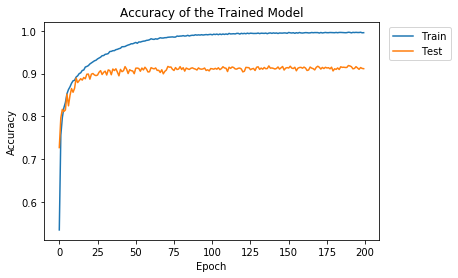

In [ ]:
# Plot accuracy vs epoch

plt.figure()
plt.plot(history_4_I.history['accuracy'])
plt.plot(history_4_I.history['val_accuracy'])
plt.title('Accuracy of the Trained Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

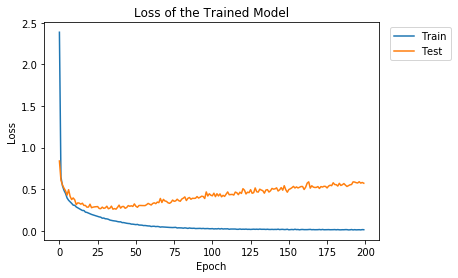

In [ ]:
# Plot loss vs epoch

plt.figure()
plt.plot(history_4_I.history['loss'])
plt.plot(history_4_I.history['val_loss'])
plt.title('Loss of the Trained Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: The loss of the training set gradually decreases to 0 *(same trend as the answer to question 1 in the part 2)*.
  
2.   What does the loss of the testing set go to? 

  ANS: The loss of the testing set initially decreases but slightly increases after then *(same trend as the answer to question 2 in the part 3)*.

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: Adding the dropout layer to the hidden layers can concretely help us randomly deactivated a certain number of neurons, thus avoiding the network learning the spurious patterns and creating an ensemble of networks. In short, it helps us reduce the model complexity.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The trained model almost work perfectly on the training set (accuracy \~100%). Also, the accuracy of the trained model on the testing set is quite good (\~ 90%).
  
  I'd say the model is a good fit for the data.

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [ ]:
# Create and train model architecture
def CNN_dropout_both(x1, x2, y):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # add 30% dropout rate to the input layer
    model.add(Dropout(0.3, input_shape=(x1, x2, 1)))

    # 1st hidden layer with input
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 1st hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 3rd hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))

    # output layer with Softmax
    model.add(Dense(y, activation='softmax'))

    return model

# Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both(28, 28, 10)

# Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both.compile(optimizer='rmsprop', 
                         loss='categorical_crossentropy', 
                         metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_4_II = CNN_dropout_both.fit(data_train, labels_train, 
                                    validation_data = (data_test, labels_test),
                                    epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training (* 100 to make it be %)
accuracy = CNN_dropout_both.evaluate(data_test, labels_test)
print("Accuracy: {0:.2f}".format(accuracy[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 21s 344us/step - loss: 4.6871 - accuracy: 0.4674 - val_loss: 1.2341 - val_accuracy: 0.6387
Epoch 2/200
60000/60000 [==============================] - 20s 339us/step - loss: 0.7904 - accuracy: 0.7001 - val_loss: 0.9686 - val_accuracy: 0.7490
Epoch 3/200
60000/60000 [==============================] - 20s 338us/step - loss: 0.6658 - accuracy: 0.7441 - val_loss: 0.8767 - val_accuracy: 0.7418
Epoch 4/200
60000/60000 [==============================] - 20s 338us/step - loss: 0.6058 - accuracy: 0.7676 - val_loss: 0.7427 - val_accuracy: 0.7776
Epoch 5/200
60000/60000 [==============================] - 20s 338us/step - loss: 0.5560 - accuracy: 0.7872 - val_loss: 0.7080 - val_accuracy: 0.8009
Epoch 6/200
60000/60000 [==============================] - 20s 338us/step - loss: 0.5154 - accuracy: 0.8015 - val_loss: 0.7805 - val_accuracy: 0.7677
Epoch 7/200
60000/60000 [=========================

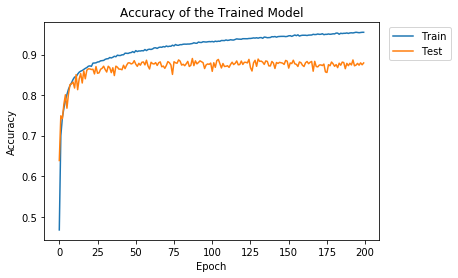

In [ ]:
# Plot accuracy vs epoch

plt.figure()
plt.plot(history_4_II.history['accuracy'])
plt.plot(history_4_II.history['val_accuracy'])
plt.title('Accuracy of the Trained Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

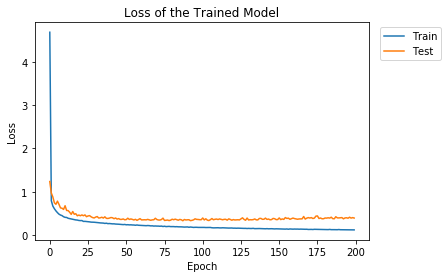

In [ ]:
# Plot loss vs epoch

plt.figure()
plt.plot(history_4_II.history['loss'])
plt.plot(history_4_II.history['val_loss'])
plt.title('Loss of the Trained Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: The loss of the training set gradually decreases close to 0.
  
2.   What does the loss of the testing set go to? 

  ANS: The loss of the testing set decreases at first, then tends to be flat till the end *(though if we draw a straight line on the plot, it seems to be a slightly increasing tendency)*. Besides, the loss of the testing set in this part gets much closer to the loss of the training set.
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: Similar to the answer to question 4 in part 4-I, the accuracy of the training set is higher than the accuracy of the testing set, but the difference between the two accuracies is smaller. In other words, two accuracy curves are closer to each other.

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS: By comparing the two accuracy plots between the part 4-I and 4-II, we could find out that the accuracy in this part (part 5) has not been improved. Thus there is also no improvement in the model robustness. I'd say two metrics (robustness and accuracy) between two parts are at the same level.

#Part 5 : Activation Functions

In [ ]:
# Create and train model architecture
def CNN_dropout_both_act(x1, x2, y):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # 1st hidden layer with input
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(x1, x2, 1)))

    # add 30% dropout rate to the 1st hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 3rd hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))

    # output layer with Sigmoid
    model.add(Dense(y, activation='sigmoid'))

    return model

# Create instance of CNN model graph
CNN_dropout_both_act_sigmoid = CNN_dropout_both_act(28, 28, 10)

# Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_sigmoid.compile(optimizer='rmsprop', 
                                     loss='categorical_crossentropy', 
                                     metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_5_1 = CNN_dropout_both_act_sigmoid.fit(data_train, labels_train, 
                                               validation_data = (data_test, labels_test),
                                               epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training 
accuracy = CNN_dropout_both_act_sigmoid.evaluate(data_test, labels_test)
print("Accuracy (sigmoid): {0:.2f}".format(accuracy[1] * 100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 334us/step - loss: 2.9474 - accuracy: 0.1358 - val_loss: 2.1437 - val_accuracy: 0.2158
Epoch 2/200
60000/60000 [==============================] - 20s 329us/step - loss: 1.9044 - accuracy: 0.2278 - val_loss: 1.6370 - val_accuracy: 0.5084
Epoch 3/200
60000/60000 [==============================] - 20s 329us/step - loss: 1.2621 - accuracy: 0.4929 - val_loss: 0.9788 - val_accuracy: 0.5828
Epoch 4/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.7936 - accuracy: 0.6484 - val_loss: 0.8005 - val_accuracy: 0.6727
Epoch 5/200
60000/60000 [==============================] - 20s 330us/step - loss: 0.6399 - accuracy: 0.7126 - val_loss: 0.5975 - val_accuracy: 0.7858
Epoch 6/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.5312 - accuracy: 0.8019 - val_loss: 0.4842 - val_accuracy: 0.8292
Epoch 7/200
60000/60000 [=========================

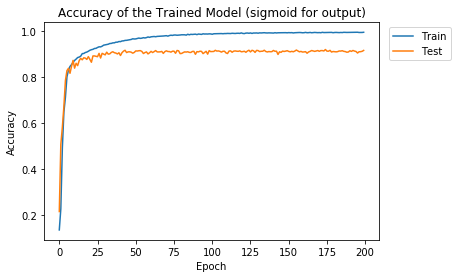

In [ ]:
# Plot accuracy vs epoch
#  - use 'sigmoid' activation function for the output layer

plt.figure()
plt.plot(history_5_1.history['accuracy'])
plt.plot(history_5_1.history['val_accuracy'])
plt.title('Accuracy of the Trained Model (sigmoid for output)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

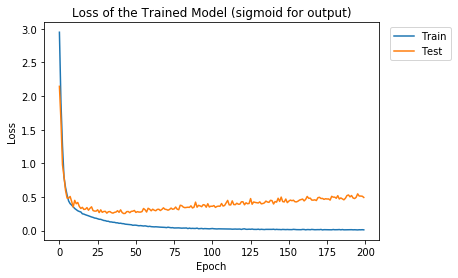

In [ ]:
# Plot loss vs epoch
#  - use 'sigmoid' activation function for the output layer

plt.figure()
plt.plot(history_5_1.history['loss'])
plt.plot(history_5_1.history['val_loss'])
plt.title('Loss of the Trained Model (sigmoid for output)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

In [ ]:
# Create and train model architecture
def CNN_dropout_both_act(x1, x2, y, activationFunc):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # 1st hidden layer with input
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(x1, x2, 1)))

    # add 30% dropout rate to the 1st hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 3rd hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))

    # output layer with Softmax
    model.add(Dense(y, activation=activationFunc))

    return model


# Create instance of CNN model graph
CNN_dropout_both_act_tanh_1  = CNN_dropout_both_act(28, 28, 10, 'tanh')

# Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_tanh_1.compile(optimizer='rmsprop', 
                                    loss='categorical_crossentropy', 
                                    metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_5_2 = CNN_dropout_both_act_tanh_1.fit(data_train, labels_train, 
                                              validation_data = (data_test, labels_test),
                                              epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training 
accuracy = CNN_dropout_both_act_tanh_1.evaluate(data_test, labels_test)
print("Accuracy (tanh): {0:.2f}".format(accuracy[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 325us/step - loss: 5.9744 - accuracy: 0.0998 - val_loss: 5.8058 - val_accuracy: 0.1000
Epoch 2/200
60000/60000 [==============================] - 19s 321us/step - loss: 5.8182 - accuracy: 0.1000 - val_loss: 5.8058 - val_accuracy: 0.1000
Epoch 3/200
60000/60000 [==============================] - 19s 320us/step - loss: 5.8058 - accuracy: 0.1000 - val_loss: 5.8058 - val_accuracy: 0.1000
Epoch 4/200
60000/60000 [==============================] - 19s 319us/step - loss: 5.8058 - accuracy: 0.1000 - val_loss: 5.8058 - val_accuracy: 0.1000
Epoch 5/200
60000/60000 [==============================] - 19s 320us/step - loss: 5.8058 - accuracy: 0.1000 - val_loss: 5.8058 - val_accuracy: 0.1000
Epoch 6/200
60000/60000 [==============================] - 19s 320us/step - loss: 5.8058 - accuracy: 0.1000 - val_loss: 5.8058 - val_accuracy: 0.1000
Epoch 7/200
60000/60000 [=========================

In [ ]:
# Create and train model architecture
def CNN_dropout_both_act(x1, x2, y, activationFunc):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # 1st hidden layer with input
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(x1, x2, 1)))

    # add 30% dropout rate to the 1st hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 3rd hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))

    # output layer with Softmax
    model.add(Dense(y, activation=activationFunc))

    return model


# Create instance of CNN model graph
CNN_dropout_both_act_tanh_2  = CNN_dropout_both_act(28, 28, 10, 'tanh')

# Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_tanh_2.compile(optimizer='rmsprop', 
                                    loss='mean_squared_error', 
                                    metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_5_3 = CNN_dropout_both_act_tanh_2.fit(data_train, labels_train, 
                                              validation_data = (data_test, labels_test),
                                              epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training 
accuracy = CNN_dropout_both_act_tanh_2.evaluate(data_test, labels_test)
print("Accuracy (tanh w/ MSE loss): {0:.2f}".format(accuracy[1] * 100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 29s 486us/step - loss: 0.9770 - accuracy: 0.1363 - val_loss: 0.0942 - val_accuracy: 0.2128
Epoch 2/200
60000/60000 [==============================] - 20s 332us/step - loss: 0.0606 - accuracy: 0.6223 - val_loss: 0.0478 - val_accuracy: 0.7605
Epoch 3/200
60000/60000 [==============================] - 20s 334us/step - loss: 0.0414 - accuracy: 0.7595 - val_loss: 0.0462 - val_accuracy: 0.7626
Epoch 4/200
60000/60000 [==============================] - 20s 334us/step - loss: 0.0345 - accuracy: 0.7844 - val_loss: 0.0407 - val_accuracy: 0.7541
Epoch 5/200
60000/60000 [==============================] - 20s 336us/step - loss: 0.0321 - accuracy: 0.7976 - val_loss: 0.0332 - val_accuracy: 0.7958
Epoch 6/200
60000/60000 [==============================] - 20s 339us/step - loss: 0.0310 - accuracy: 0.8085 - val_loss: 0.0302 - val_accuracy: 0.8118
Epoch 7/200
60000/60000 [=========================

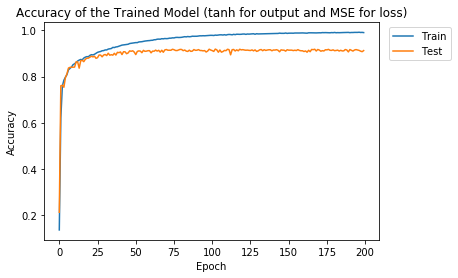

In [ ]:
# Plot accuracy vs epoch
#  - use 'tanh' activation function for the output layer
#  - use MSE loss

plt.figure()
plt.plot(history_5_3.history['accuracy'])
plt.plot(history_5_3.history['val_accuracy'])
plt.title('Accuracy of the Trained Model (tanh for output and MSE for loss)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

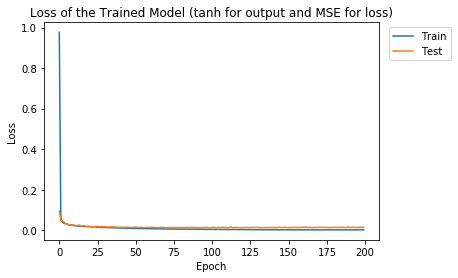

In [ ]:
# Plot loss vs epoch
#  - use 'tanh' activation function for the output layer
#  - use MSE loss

plt.figure()
plt.plot(history_5_3.history['loss'])
plt.plot(history_5_3.history['val_loss'])
plt.title('Loss of the Trained Model (tanh for output and MSE for loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS: The results of accuracy and loss for using sigmoid as the output layer activation function have a wider range than the softmax results.  

  Besides, in terms of the performance, using sigmoid as the output layer activation function is slightly better (accuracy on the testing set: 91.71) than the softmax results (accuracy on the testing set: 87.94).
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: No, tanh as output activation does not work with cross-entropy loss.

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: The cross-entropy loss expects the inputs to be in the range of 0 to 1. However, the tanh transforms the input to values in the range -1 to 1, which the cross-entropy loss cannot handle.

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: Sigmoid guarantees that the output will always be between 0 and 1, so sigmoid does not cause problems as tanh with Cross-entropy loss.


# Part 5 : Bonus

3-a.   Change hidden units to sigmoid and tanh and report the accuracy and loss plots for the training and testing sets.

In [ ]:
# Create and train model architecture
def CNN_bonus_sigmoid(x1, x2, y):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # 1st hidden layer with input
    model.add(Conv2D(256, (3, 3), activation='sigmoid', kernel_initializer='he_normal', input_shape=(x1, x2, 1)))

    # add 30% dropout rate to the 1st hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 3rd hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='sigmoid',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='sigmoid',kernel_initializer='he_normal'))

    # output layer with Softmax
    model.add(Dense(y, activation='softmax'))

    return model

# Create instance of CNN model graph
CNN_bonus_sigmoid = CNN_bonus_sigmoid(28, 28, 10)

# Compile model using an appropriate loss and optimizer algorithm
CNN_bonus_sigmoid.compile(optimizer='rmsprop', 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_5_b_sigmoid = CNN_bonus_sigmoid.fit(data_train, labels_train, 
                                            validation_data = (data_test, labels_test),
                                            epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training 
accuracy = CNN_bonus_sigmoid.evaluate(data_test, labels_test)
print("Accuracy (bonus w/ sigmoid): {0:.2f}".format(accuracy[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 29s 479us/step - loss: 2.2282 - accuracy: 0.2000 - val_loss: 1.8755 - val_accuracy: 0.4757
Epoch 2/200
60000/60000 [==============================] - 20s 328us/step - loss: 1.4815 - accuracy: 0.5649 - val_loss: 1.2952 - val_accuracy: 0.6259
Epoch 3/200
60000/60000 [==============================] - 20s 329us/step - loss: 1.1125 - accuracy: 0.6582 - val_loss: 1.0444 - val_accuracy: 0.6774
Epoch 4/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.9260 - accuracy: 0.6934 - val_loss: 0.8664 - val_accuracy: 0.7267
Epoch 5/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.7995 - accuracy: 0.7212 - val_loss: 0.8069 - val_accuracy: 0.7142
Epoch 6/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.7419 - accuracy: 0.7300 - val_loss: 0.7414 - val_accuracy: 0.7294
Epoch 7/200
60000/60000 [=========================

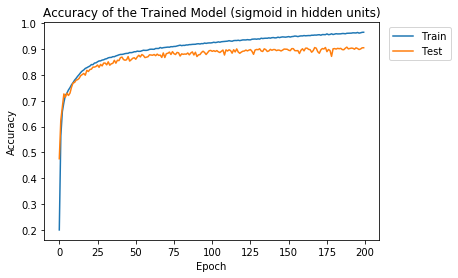

In [ ]:
# Plot accuracy vs epoch
#  - use 'sigmoid' in hidden units
#  - use 'softmax' in output layer
#  - use 'categorical cross-entropy' loss

plt.figure()
plt.plot(history_5_b_sigmoid.history['accuracy'])
plt.plot(history_5_b_sigmoid.history['val_accuracy'])
plt.title('Accuracy of the Trained Model (sigmoid in hidden units)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

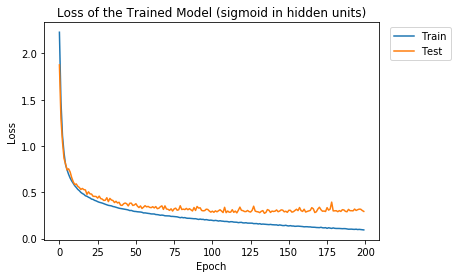

In [ ]:
# Plot loss vs epoch
#  - use 'sigmoid' in hidden units
#  - use 'softmax' in output layer
#  - use 'categorical cross-entropy' loss

plt.figure()
plt.plot(history_5_b_sigmoid.history['loss'])
plt.plot(history_5_b_sigmoid.history['val_loss'])
plt.title('Loss of the Trained Model (sigmoid in hidden units)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

In [ ]:
# Create and train model architecture
def CNN_bonus_tanh(x1, x2, y):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # 1st hidden layer with input
    model.add(Conv2D(256, (3, 3), activation='tanh', kernel_initializer='he_normal', input_shape=(x1, x2, 1)))

    # add 30% dropout rate to the 1st hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='tanh', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 3rd hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='tanh',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='tanh',kernel_initializer='he_normal'))

    # output layer with Softmax
    model.add(Dense(y, activation='softmax'))

    return model

# Create instance of CNN model graph
CNN_bonus_tanh = CNN_bonus_tanh(28, 28, 10)

# Compile model using an appropriate loss and optimizer algorithm
CNN_bonus_tanh.compile(optimizer='rmsprop', 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_5_b_tanh = CNN_bonus_tanh.fit(data_train, labels_train, 
                                      validation_data = (data_test, labels_test),
                                      epochs=200, batch_size=2048)

# Print accuracy of model on testing set after training 
accuracy = CNN_bonus_tanh.evaluate(data_test, labels_test)
print("Accuracy (bonus w/ tanh): {0:.2f}".format(accuracy[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 20s 333us/step - loss: 1.4484 - accuracy: 0.4841 - val_loss: 1.0395 - val_accuracy: 0.6325
Epoch 2/200
60000/60000 [==============================] - 20s 328us/step - loss: 0.6469 - accuracy: 0.7519 - val_loss: 0.6985 - val_accuracy: 0.7448
Epoch 3/200
60000/60000 [==============================] - 20s 328us/step - loss: 0.5393 - accuracy: 0.7943 - val_loss: 0.7047 - val_accuracy: 0.7380
Epoch 4/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.4810 - accuracy: 0.8166 - val_loss: 0.5896 - val_accuracy: 0.7827
Epoch 5/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.4301 - accuracy: 0.8389 - val_loss: 0.5563 - val_accuracy: 0.7976
Epoch 6/200
60000/60000 [==============================] - 20s 329us/step - loss: 0.3892 - accuracy: 0.8533 - val_loss: 0.5788 - val_accuracy: 0.7623
Epoch 7/200
60000/60000 [=========================

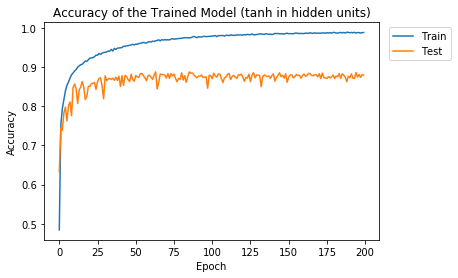

In [ ]:
# Plot loss vs epoch
#  - use 'tanh' in hidden units
#  - use 'softmax' in output layer
#  - use 'categorical cross-entropy' loss

plt.figure()
plt.plot(history_5_b_tanh.history['accuracy'])
plt.plot(history_5_b_tanh.history['val_accuracy'])
plt.title('Accuracy of the Trained Model (tanh in hidden units)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

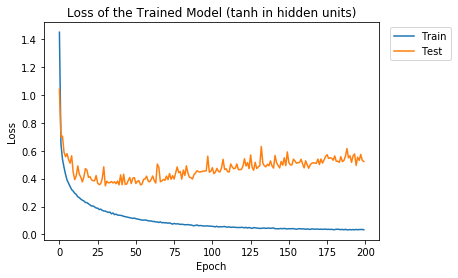

In [ ]:
# Plot loss vs epoch
#  - use 'tanh' in hidden units
#  - use 'softmax' in output layer
#  - use 'categorical cross-entropy' loss

plt.figure()
plt.plot(history_5_b_tanh.history['loss'])
plt.plot(history_5_b_tanh.history['val_loss'])
plt.title('Loss of the Trained Model (tanh in hidden units)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

3-b.   When using ReLU hidden layer activations, compare average activity [number of active neurons] in layers during training and testing.  

  i.  Note 1: Choose and fix few images over which you want to calculate the average activity in the layers during training and testing.
  
  ii.  Note 2: Choose certain epochs on which you will be calculating the activity. Doing it on every epoch will reduce your speed of training.



In [4]:
# [Reference Website]
#  - https://keras.io/guides/sequential_model/#feature-extraction-with-a-sequential-model
#  - https://keras.io/api/callbacks/
#  - https://keras.io/guides/writing_your_own_callbacks/
#  - https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer

# Create and train model architecture
def CNN_bonus_relu(x1, x2, y):
    # Easiest way to build model in Keras is using Squential. It allows models to 
    # be built layer by layer as we will do here
    model = Sequential()

    # 1st hidden layer with input
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(x1, x2, 1)))

    # add 30% dropout rate to the 1st hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))

    # add 30% dropout rate to the 3rd hidden layer
    model.add(Dropout(0.3))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu',kernel_initializer='he_normal'))

    # output layer with Softmax
    model.add(Dense(y, activation='softmax'))

    return model

class callback_train(keras.callbacks.Callback):
    def __init__(self, data, epoch):
        self.data = data
        self.epoch = epoch - 1

    def on_epoch_end(self, epoch, logs=None):
        if epoch == self.epoch:
            from keras import backend as K

            print('\n======================================================================================================')
            print(  '=  Average activity (number of active neurons) @ Training                                            =')
            print(  '======================================================================================================')

            inputs = self.model.input
            outputs = [layer.output for layer in self.model.layers]
            functions = [K.function([inputs], [output]) for output in outputs]
            layer_outputs = [func([self.data[:5]]) for func in functions]
            
            for i in range(len(layer_outputs)):
                layer = self.model.layers[i]
                output = layer_outputs[i]
                print('[ Layer: {0:<17} ] Output Shape: {1:<17}; Avg Activity: {2} / {3} = {4:.3f}'.format(
                    layer.name, 
                    output[0].shape, 
                    output[0].size - np.count_nonzero(output[0] == 0), 
                    output[0].size, 
                    (output[0].size - np.count_nonzero(output[0] == 0)) / float(output[0].size)
                ))

            print(  '======================================================================================================\n')

class callback_evaluate(keras.callbacks.Callback):
    def __init__(self, data):
        self.data = data

    def on_test_end(self, logs=None):
        from keras import backend as K

        print('\n======================================================================================================')
        print(  '=  Average activity (number of active neurons) @ Testing                                             =')
        print(  '======================================================================================================')

        inputs = self.model.input
        outputs = [layer.output for layer in self.model.layers]
        functions = [K.function([inputs], [output]) for output in outputs]
        layer_outputs = [func([self.data[:5]]) for func in functions]
        
        for i in range(len(layer_outputs)):
            layer = self.model.layers[i]
            output = layer_outputs[i]
            print('[ Layer: {0:<17} ] Output Shape: {1:<17}; Avg Activity: {2} / {3} = {4:.3f}'.format(
                layer.name, 
                output[0].shape, 
                output[0].size - np.count_nonzero(output[0] == 0), 
                output[0].size, 
                (output[0].size - np.count_nonzero(output[0] == 0)) / float(output[0].size)
            ))

        print(  '======================================================================================================\n')

# Create instance of CNN model graph
CNN_bonus_relu = CNN_bonus_relu(28, 28, 10)

# Compile model using an appropriate loss and optimizer algorithm
CNN_bonus_relu.compile(optimizer='rmsprop', 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_5_b_sigmoid = CNN_bonus_relu.fit(data_train, labels_train, 
                                         validation_data = (data_test, labels_test),
                                         epochs=200, batch_size=2048,
                                         callbacks=[callback_train(data_train, 100)])

# Print accuracy of model on testing set after training 
accuracy = CNN_bonus_relu.evaluate(data_test, labels_test, 
                                   callbacks=[callback_evaluate(data_test)])
print("Accuracy (bonus w/ relu): {0:.2f}".format(accuracy[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 29s 476us/step - loss: 2.9089 - accuracy: 0.5254 - val_loss: 0.8704 - val_accuracy: 0.7245
Epoch 2/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.6454 - accuracy: 0.7560 - val_loss: 0.6954 - val_accuracy: 0.7754
Epoch 3/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.5754 - accuracy: 0.7839 - val_loss: 0.6513 - val_accuracy: 0.7631
Epoch 4/200
60000/60000 [==============================] - 20s 326us/step - loss: 0.5039 - accuracy: 0.8087 - val_loss: 0.6316 - val_accuracy: 0.7863
Epoch 5/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.4588 - accuracy: 0.8289 - val_loss: 0.4853 - val_accuracy: 0.8393
Epoch 6/200
60000/60000 [==============================] - 20s 327us/step - loss: 0.4236 - accuracy: 0.8420 - val_loss: 0.4126 - val_accuracy: 0.8584
Epoch 7/200
60000/60000 [=========================

#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [ ]:
# Download RML 2016.10b dataset and untar file
# !wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!wget --no-check-certificate https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210916115247_84b50b3812dca07b9149063a_1c5208f20c8e87b4a5b3693f313c0b153d82004d_002_20210916125247_0027_dnld \
      -O RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

--2021-09-16 11:53:17--  https://f002.backblazeb2.com/file/deepsig-datasets/2016.10/RML2016.10b.tar.bz2?Authorization=3_20210916115247_84b50b3812dca07b9149063a_1c5208f20c8e87b4a5b3693f313c0b153d82004d_002_20210916125247_0027_dnld
Resolving f002.backblazeb2.com (f002.backblazeb2.com)... 206.190.215.16
Connecting to f002.backblazeb2.com (f002.backblazeb2.com)|206.190.215.16|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G  56.3MB/s    in 22s     

2021-09-16 11:53:39 (53.5 MB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [ ]:
# Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))

X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))

X_train = X[train_idx]
X_test  = X[test_idx]

def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1

Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test  = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test  = X_test.reshape(108000, 2, 128, 1)

In [ ]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    model.add(Conv2D(256, (1, 3), activation='relu', use_bias = True, kernel_initializer='he_normal',input_shape=(2, 128, 1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (2, 3), activation='relu', kernel_initializer='he_normal'))
    model.add(Conv2D(80, (1, 3), activation='relu', use_bias = True, kernel_initializer='he_normal'))
    model.add(Dropout(0.2))
    model.add(Conv2D(80, (1, 3), activation='relu', use_bias = True, kernel_initializer='he_normal'))
    model.add(Reshape((-1, 80)))
    model.add(LSTM(50, bias_initializer='ones'))
    model.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(10, activation='softmax'))
    
    return model

# Create instance of CNN model graph
cldnn = cldnn()

# Compile model using an appropriate loss and optimizer algorithm
cldnn.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and assign training meta-data to a variable
history_6 = cldnn.fit(X_train, Y_train, 
                      validation_data = (X_test, Y_test),
                      epochs=100, batch_size=4096)

# Print accuracy of model on testing set after training 
accuracy = cldnn.evaluate(X_test, Y_test)
print("Accuracy (cldnn): {0:.2f}".format(accuracy[1] * 100))

Train on 432000 samples, validate on 108000 samples
Epoch 1/100
432000/432000 [==============================] - 215s 498us/step - loss: 1.9442 - accuracy: 0.2328 - val_loss: 1.6289 - val_accuracy: 0.3286
Epoch 2/100
432000/432000 [==============================] - 202s 468us/step - loss: 1.3600 - accuracy: 0.4200 - val_loss: 1.2039 - val_accuracy: 0.4692
Epoch 3/100
432000/432000 [==============================] - 202s 468us/step - loss: 1.0937 - accuracy: 0.5258 - val_loss: 0.8726 - val_accuracy: 0.6212
Epoch 4/100
432000/432000 [==============================] - 202s 468us/step - loss: 0.8642 - accuracy: 0.6168 - val_loss: 0.7591 - val_accuracy: 0.6406
Epoch 5/100
432000/432000 [==============================] - 202s 467us/step - loss: 0.7337 - accuracy: 0.6727 - val_loss: 0.5772 - val_accuracy: 0.7275
Epoch 6/100
432000/432000 [==============================] - 202s 467us/step - loss: 0.6081 - accuracy: 0.7120 - val_loss: 0.4956 - val_accuracy: 0.7463
Epoch 7/100
432000/432000 [===

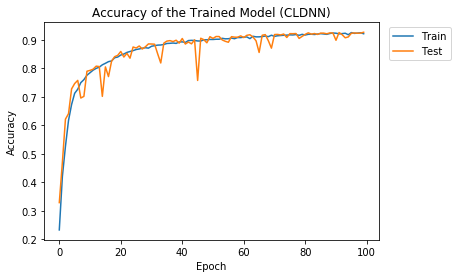

In [ ]:
# Plot accuracy vs epoch

plt.figure()
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Accuracy of the Trained Model (CLDNN)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

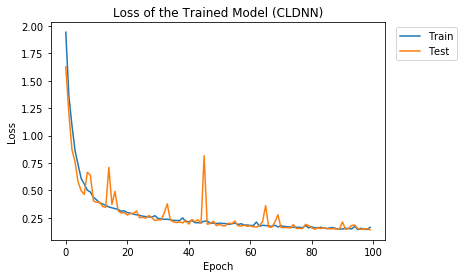

In [ ]:
# Plot loss vs epoch

plt.figure()
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Loss of the Trained Model (CLDNN)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: Yes, this model is a good fit for the data (accuracies on both training set and testing set are close to 0.92).

2.   Give two ways to improve the robustness of the model.

  ANS: First, we could improve the model's robustness by preventing overfitting. Just as in question 4-b in part 2, we could avoid the overfitting by applying regularization (adding a cost to the loss function for large weights) or using dropout layers (randomly remove certain features by setting them to zero).

  Second, we could do noise injection or say data set augmentation to reduce overfitting and improve model generalization, thus improving the model robustness (a nice reference material is here [click](https://https://machinelearningmastery.com/how-to-improve-deep-learning-model-robustness-by-adding-noise/)).